In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy 
%matplotlib inline
df = pd.read_csv('cdata.csv')


C:\Users\USER\Anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\USER\Anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


523.7152817868878


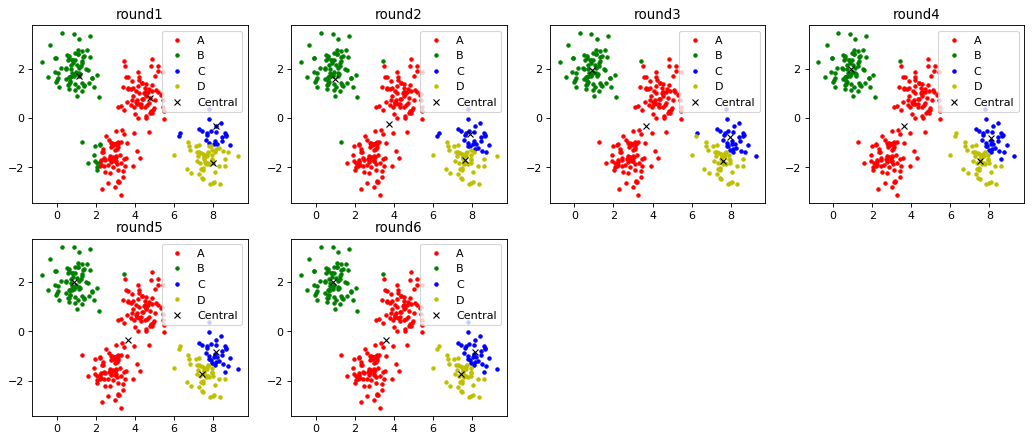

In [2]:
#print(df)
simu = df
simu.is_copy = False
last_cent = []
#print(simu)
x = df['x']
y = df['y']
#plt.plot(x,y,'g.')
k = 4
f = 1
central = []
dist = []
clu = []
cnt = 0
sse = 0.0
f1, f2, f3, f4,f5 = 0, 0, 0 ,0 , 0 

# random to find the k point
for i in range(0,k):
    central.append(df.iloc[random.randint(0,df.shape[0])][0:2])
    #print (random.randint(0,df.shape[0]))
#print(central)
#plt.figure(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')
fig=plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')
while True:
    
    # record the distance
    for i in range(simu.shape[0]):
        for j in range(0,k):
            #dist.append(numpy.sqrt(numpy.sum(numpy.square(df.iloc[i][0:2] - df.iloc[central[j]][0:2]))))
            dist.append(numpy.sqrt(numpy.sum(numpy.square(simu.loc[i][0:2] - central[j][0:2]))))
            #print(dist)
        #print(min(dist))
        simu.loc[i,'z'] = int(dist.index(min(dist)))
        #simu.loc[i][2] = dist.index(min(dist))
        clu.append(dist.index(min(dist)))
        dist.clear()
    
    # simu.loc[1,'z'] = 2  # can't change the value in df
    # it will be order of the cluster 0 to 4
    simu.sort_values(by='z', inplace=True)
    #print(simu)
    
    plt.subplot(3,4,f)
    plt.title('round'+str(f))
    #plt.legend()
   
    #plot 
    #plt.legend(simu['z'],bbox_to_anchor=(0.3,1), loc='center right', borderaxespad=0.)
    for i in range(df.shape[0]):
        if simu.iloc[i]['z'] == 0:
            if f1 == 0:
                plt.plot(simu.iloc[i][0],simu.iloc[i][1],'r.',label = 'A')
                f1 = 1
            else:
                plt.plot(simu.iloc[i][0],simu.iloc[i][1],'r.')
        elif simu.iloc[i]['z'] == 1:
            if f2 == 0:
                plt.plot(simu.iloc[i][0],simu.iloc[i][1],'g.',label = 'B')
                f2 = 1
            else:
                plt.plot(simu.iloc[i][0],simu.iloc[i][1],'g.')
        elif simu.iloc[i]['z'] == 2:
            if f3 == 0:
                plt.plot(simu.iloc[i][0],simu.iloc[i][1],'b.',label = 'C')
                f3 = 1
            else:
                plt.plot(simu.iloc[i][0],simu.iloc[i][1],'b.')
        elif simu.iloc[i]['z'] == 3:
            if f4 == 0:
                plt.plot(simu.iloc[i][0],simu.iloc[i][1],'y.',label = 'D')
                f4 = 1
            else:
                plt.plot(simu.iloc[i][0],simu.iloc[i][1],'y.')
        elif simu.iloc[i]['z'] == 4:
            plt.plot(simu.iloc[i][0],simu.iloc[i][1],'c.')
        elif simu.iloc[i]['z'] == 5:
            plt.plot(simu.iloc[i][0],simu.iloc[i][1],'m.')
        elif simu.iloc[i]['z'] == 6:
            plt.plot(simu.iloc[i][0],simu.iloc[i][1],'y.')
        elif simu.iloc[i]['z'] == 7:
            plt.plot(simu.iloc[i][0],simu.iloc[i][1],'y.')
        elif simu.iloc[i]['z'] == 8:
            plt.plot(simu.iloc[i][0],simu.iloc[i][1],'y.')
        elif simu.iloc[i]['z'] == 9:
            plt.plot(simu.iloc[i][0],simu.iloc[i][1],'y.')
    #a = ['A','B','C','D']
    #plt.gca().legend(a)
   
    # plot the central point
    for i in range(0,k):
        if f5 == 0:
            plt.plot(central[i][0],central[i][1],'kx',label = 'Central')
            f5 = 1
        else:
            plt.plot(central[i][0],central[i][1],'kx')
        if f > 2:
            #print(central[i][0])
            #print(last_cent[i][0])
            if round(central[i][0],3) == round(last_cent[i][0],3) and round(central[i][1],3) == round(last_cent[i][1],3):
                cnt += 1
                #print(cnt)
    last_cent = list(central)    
    central.clear()
    plt.legend(loc="upper right")
    
    # find the new central point
    #print(simu.groupby('z').mean())
    #print(simu.groupby('z').mean().iloc[1][0:2])    
    for i in range(0,k):
        #print(simu.groupby('z').mean().iloc[i][0:2])
        central.append(simu.groupby('z').mean().iloc[i][0:2])
    #print(central)
    f += 1

    #if f > 2:
    #    print(np.all(central == last_cent))
    
    # avoid that the data be convergence so the plot maximum is 7
    if cnt == k or f == 8:
        for i in range(simu.shape[0]):
            #sse += numpy.sqrt(numpy.sum(numpy.square(simu.loc[i][0:2] - last_cent[int(simu.iloc[i]['z'])][0:2])))
            sse += numpy.sum(numpy.square(simu.iloc[i][0:2] - last_cent[int(simu.iloc[i]['z'])][0:2]))
            #print(simu.loc[i][0:2])
            #print(last_cent[int(simu.iloc[i]['z'])][0:2])
            #print(numpy.sum(numpy.square(simu.loc[i][0:2] - last_cent[int(simu.iloc[i]['z'])][0:2])))
        print(sse)
        #print(simu)
        #print(last_cent)
        
        break
    f1, f2, f3, f4,f5 = 0, 0, 0 ,0 , 0 
    cnt = 0
    simu.pop('z')
#print(clu)
#print(df.iloc[0][0:2])

In [3]:
central.clear()
last_cent.clear()
dist.clear()
sse = 0
fig=plt.figure(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')
f = 1
sse_plt = []
for k in range(1,11):
    for i in range(0,k):
        central.append(df.iloc[random.randint(0,df.shape[0])][0:2])
    while True:    
        for i in range(simu.shape[0]):
            for j in range(0,k):
                dist.append(numpy.sqrt(numpy.sum(numpy.square(simu.loc[i][0:2] - central[j][0:2]))))
            simu.loc[i,'z'] = int(dist.index(min(dist)))
            clu.append(dist.index(min(dist)))
            dist.clear()

        simu.sort_values(by='z', inplace=True)

        for i in range(0,k):
            if f > 2:
                if round(central[i][0],3) == round(last_cent[i][0],3) and round(central[i][1],3) == round(last_cent[i][1],3):
                    cnt += 1
        last_cent = list(central)    
        central.clear()

        for ii in range(0,k):
            central.append(simu.groupby('z').mean().iloc[ii][0:2])
        #print(simu.groupby('z').mean())
        f += 1

        if cnt == k or f == 8:
            for i in range(simu.shape[0]):
                sse += numpy.sum(numpy.square(simu.iloc[i][0:2] - last_cent[int(simu.iloc[i]['z'])][0:2]))
            sse_plt.append(sse)
            print(sse)
            #print(simu.groupby('z').mean())
            break
        cnt = 0
        simu.pop('z')
        sse = 0.0
    
    f = 1
    central.clear()
    last_cent.clear()
    dist.clear()

2812.137335869002
1192.6193139028967
621.2610056613967
212.00641145466687
196.81340961774285
179.4061069378088
161.71279350539626
151.76154787779325
145.1123125160867
115.91479522652212


<Figure size 960x640 with 0 Axes>

Text(0,0.5,'Sum of square error')

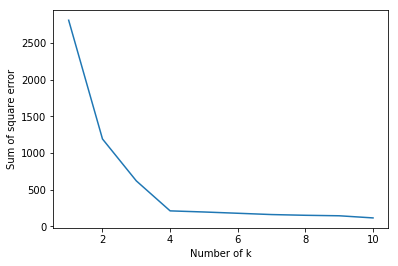

In [4]:
# sse_plt2 = [2812.13,1210.01,1166.95,676.03,188.77,177.49,178.80,145.98,138.03,117.25]
# plt.plot(range(1,len(sse_plt2)+1),sse_plt2)
plt.plot(range(1,len(sse_plt)+1),sse_plt)
plt.xlabel('Number of k')
plt.ylabel('Sum of square error')
#plt.plot(range(1,len(sse_plt)+1),sse_plt)

In [20]:
central.clear()
last_cent.clear()
dist.clear()
sse = 0.0
f = 1
record = []
k = 9
for ii in range(0,10):
    for i in range(0,k):
        central.append(df.iloc[random.randint(0,df.shape[0])][0:2])

    while True:    
        for i in range(simu.shape[0]):
            for j in range(0,k):
                dist.append(numpy.sqrt(numpy.sum(numpy.square(simu.loc[i][0:2] - central[j][0:2]))))
            simu.loc[i,'z'] = int(dist.index(min(dist)))
            clu.append(dist.index(min(dist)))
            dist.clear()

        simu.sort_values(by='z', inplace=True)

        for i in range(0,k):
            if f > 2:
                if round(central[i][0],3) == round(last_cent[i][0],3) and round(central[i][1],3) == round(last_cent[i][1],3):
                    cnt += 1
                    #print(cnt)
        last_cent = list(central)    
        central.clear()

        for i in range(0,k):
            central.append(simu.groupby('z').mean().iloc[i][0:2])

        f += 1

        if cnt == k or f == 8:
            for i in range(simu.shape[0]):
                sse += numpy.sum(numpy.square(simu.iloc[i][0:2] - last_cent[int(simu.iloc[i]['z'])][0:2]))
            print(sse)
            record.append(sse)
            sse = 0.0
            break
        cnt = 0
        simu.pop('z')
    central.clear()
    last_cent.clear()
    dist.clear()
    f = 1

218.72508152999984
382.02315261999996
272.13652773999996
275.55447029000004
251.15583248999994
281.8879290600001
1333.0512595600003
191.50452507000008
330.2313675100001
220.8960409800001


<BarContainer object of 10 artists>

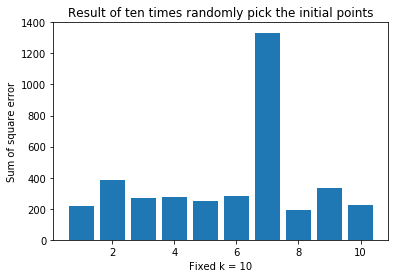

In [21]:
# record2 = [126.12,119.52,129.39,116.13,143.30,113.58,114.40,150.26,140.32,121.36]
plt.title('Result of ten times randomly pick the initial points')
plt.xlabel('Fixed k = 10')
plt.ylabel('Sum of square error')
# plt.bar(range(1,len(record2)+1),record2)
plt.bar(range(1,len(record)+1),record)